# Homework 8 Problem 1

## Luke Meiler

### Imports

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from integrals import *

In [9]:
%load_ext pycodestyle_magic
%pycodestyle_off

In [2]:
# Number of subintervals
n1 = 100

# Desired Accuracy
acc = 0.01

In [3]:
expSimp = simpson(np.exp, 0, 10, n1)
# expSimp2 = simpson(np.exp, 0, 2*np.pi, n1)
# expSimp3 = simpson(np.exp, -1, 1, n1)

expTrap = trapezoid(np.exp, 0, 10, n1)
# expTrap2 = trapezoid(np.exp, 0, 2*np.pi, n1)
# expTrap3 = trapezoid(np.exp, -1, 1, n1)

expAdp = adaptive_trapezoid(np.exp, 0, 10, acc, output=True)
# expAdp2 = adaptive_trapezoid(np.exp, 0, 2*np.pi, n1)
# expAdp3 = adaptive_trapezoid(np.exp, -1, 1, n1)

print("Simpson: {}, Trapezoid: {}, Adaptive Trapezoid: {}".format(expSimp, expTrap, expAdp))

N = 2,  Integral = 110137.32897403359
N = 2.0,  Integral = 55810.73028252968
N = 4.0,  Integral = 32455.927412306755
N = 8.0,  Integral = 24821.354153296994
N = 16.0,  Integral = 22737.81578168463
N = 32.0,  Integral = 22204.418433198334
N = 64.0,  Integral = 22070.25849666271
N = 128.0,  Integral = 22036.667386590423
N = 256.0,  Integral = 22028.26640638897
N = 512.0,  Integral = 22026.16596105638
N = 1024.0,  Integral = 22025.64083720381
N = 2048.0,  Integral = 22025.509555458186
N = 4096.0,  Integral = 22025.476734972854
N = 8192.0,  Integral = 22025.46852984847
Simpson: 22025.478016624784, Trapezoid: 22043.817291271436, Adaptive Trapezoid: 22025.46852984847


In [4]:
sinSimp = simpson(lambda x : np.sin(1/x), 0.001, 2*np.pi, n1)

sinTrap = trapezoid(lambda x : np.sin(1/x), 0.001, 2*np.pi, n1)

sinAdp = adaptive_trapezoid(lambda x : np.sin(1/x), 0.001, 2*np.pi, acc, output=True)

print("Simpson: {}, Trapezoid: {}, Adaptive Trapezoid: {}".format(sinSimp, sinTrap, sinAdp))

N = 2,  Integral = 3.0951178220540245
N = 2.0,  Integral = 2.5304497968881905
N = 4.0,  Integral = 2.5292680175100286
Simpson: 2.2894597239764987, Trapezoid: 2.3242075851696438, Adaptive Trapezoid: 2.5292680175100286


In [5]:
def cubed(x):
    """Takes a value and returns the cube of it.

    Parameters:

    x: int

        The value that you wish to cube

    Returns:

    cubed: int

        The x value cubed"""
    cubed = np.power(x, 3)
    return cubed

In [6]:
cubeSimp = simpson(cubed, -1, 1, n1)

cubeTrap = trapezoid(cubed, -1, 1, n1)

cubeAdp = adaptive_trapezoid(cubed, -1, 1, acc, output=True)

print("Simpson: {}, Trapezoid: {}, Adaptive Trapezoid: {}".format(cubeSimp, cubeTrap, cubeAdp))

N = 2,  Integral = 0.0
N = 2.0,  Integral = 0.0
Simpson: 3.700743415417188e-17, Trapezoid: 3.552713678800501e-17, Adaptive Trapezoid: 0.0


## Comparison

Looking at these three functions, we can compare the accuracies and efficiencies of the three algorithms on them. Starting with the exponenetial function, we will take the correct answer from Wolfram Alpha to be $22025.4657948067$. We immediately see that the trapezoidal algorithm did not even get the correct integer. The adaptive trapezoidal algorithm was the closest of the three, having taken 14 steps to reach the answer to the specified accuracy of $0.01$

Moving on to the second function: $\sin(\frac{1}{x})$. Again from Wolfram Alpha we take the correct answer to be $2.2627709233212313$. We see that this time the adaptive trapezoidal algorithm was the furthest from the correct answer, with Simpson being the closest. The former only took 3 steps, so if we increase the accuracy then the adaptive trapezoidal should be the closest. Let's try reducing the accuracy threshold from $0.01$ to $0.001$:

In [7]:
sinAdp2 = adaptive_trapezoid(lambda x : np.sin(1/x), 0.001, 2*np.pi, 0.001, output=True)

N = 2,  Integral = 3.0951178220540245
N = 2.0,  Integral = 2.5304497968881905
N = 4.0,  Integral = 2.5292680175100286


This did not change anything, so let's try lowering it one more time:

In [8]:
sinAdp3 = adaptive_trapezoid(lambda x : np.sin(1/x), 0.001, 2*np.pi, 0.0001, output=True)

N = 2,  Integral = 3.0951178220540245
N = 2.0,  Integral = 2.5304497968881905
N = 4.0,  Integral = 2.5292680175100286
N = 8.0,  Integral = 2.6781963428010456
N = 16.0,  Integral = 2.529189610341927
N = 32.0,  Integral = 2.2492139772996858
N = 64.0,  Integral = 2.201254431210271
N = 128.0,  Integral = 2.296892965294766
N = 256.0,  Integral = 2.333840754973749
N = 512.0,  Integral = 2.300529546433894
N = 1024.0,  Integral = 2.287520349929671
N = 2048.0,  Integral = 2.270616364560721
N = 4096.0,  Integral = 2.261950293846196
N = 8192.0,  Integral = 2.2640752392736543
N = 16384.0,  Integral = 2.2644039264688733
N = 32768.0,  Integral = 2.2635804731922153
N = 65536.0,  Integral = 2.263441240200778


Here we now see that the algorithm took the same number of steps as last time, 14, to reach the desired accuracy. It is by far the most accuracte at this point as well.

Last, we look at the integral of $x^3$ from $-1$ to $1$. We know that the integral should be $0$, as we are integrating an odd function over symmetric bounds. We see that only the adaptive trapezoidal algorithm reached the correct answer, and it did it in only two steps. The other algorithms had very small answers, but only the adaptive trapezoidal algorithm reached the actual correct answer.

We can conclude that the adaptive trapezoidal algorithm is the most accurate of the three, as it was the algorithm to reach the most correct answer most of the time.

## Antiderivatives and Plotting

The antiderivative of $e^x$ is just $e^x$. The antiderivative for $\sin(\frac{1}{x})$ gives a real and imaginary part, so we will just take the real component $x \sin(\frac{1}{x})$. The antiderivative of $x^3$ is just $\frac{x^4}{4}$.

### Plotting

First the exponential function on the interval $[0,10]$:

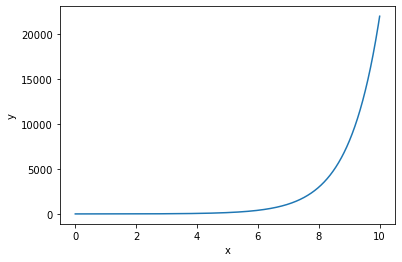

In [9]:
x_1 = 0
x_2 = 10
xvals = np.linspace(x_1, x_2, 10000)
yvals = np.exp(xvals)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xvals, yvals)
plt.show()

Next, the $\sin(\frac{1}{x})$ antiderivative from $0$ to $2 \pi$.

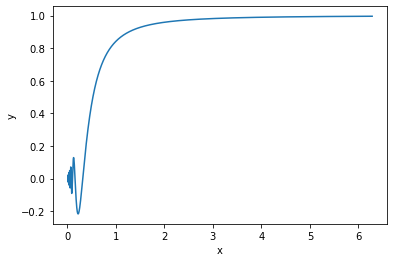

In [10]:
a = 0.01
b = 2*np.pi
xvals2 = np.linspace(a, b, 10000)
yvals2 = xvals2*np.sin(1./xvals2)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xvals2, yvals2)
plt.show()

Last, we plot the function $\frac{x^4}{4}$ from $-1$ to $1$:

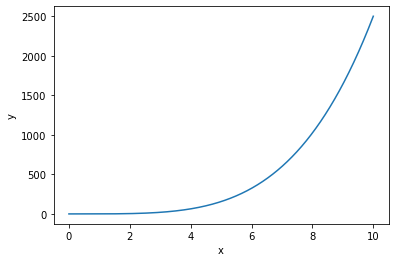

In [11]:
x_3 = 0
x_4 = 10
xvals3 = np.linspace(x_3, x_4, 10000)
yvals3 = (xvals3**4) / 4
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xvals3, yvals3)
plt.show()